# 模型解釋

在經過集成式(ensemble)學習之後的 tree based 機器學習演算法，該方法通常可以提高相當不錯的模型成效，但是其中的理論很難讓人去參透，常常被人詬病說是一個黑盒子。 

一個黑盒子是很難去判斷裡面做了什麼事情，我們如果要進行做決策、改良模型等等，都需要了解這個演算法到底學習到了什麼。

這時候模型解釋就相當重要，有一塊領域 Explainable AI 就是在探討這方面的知識。

機器學習與人一樣不是聖賢，還是會有犯錯的可能性。當發生預測錯誤的時候，若我們能夠透過解釋型 AI 告訴合理的原因，或許可為下一次改版做一些根因探討。「科技始終來自於人性」，我們有時候很難跟我們的需求方講解或討論這些演算法的深奧的原理或數學知識，也隨著我們越來越倚重機器學習產出的結果，我們勢必也需要能了解其中的原因，我們才可以用的安心，讓大家放心。

## Shap

Shap 最早來源是賽局理論，詳細可以[參考wiki](https://en.wikipedia.org/wiki/Shapley_value)。Shap 是將模型的預測解釋分析成每個因子的貢獻，計算每個特徵的 shapely value，來衡量該特徵對預測的貢獻度。如此一來，我們可以詳細了解每個因子的貢獻程度。

[github 連結](https://github.com/slundberg/shap)

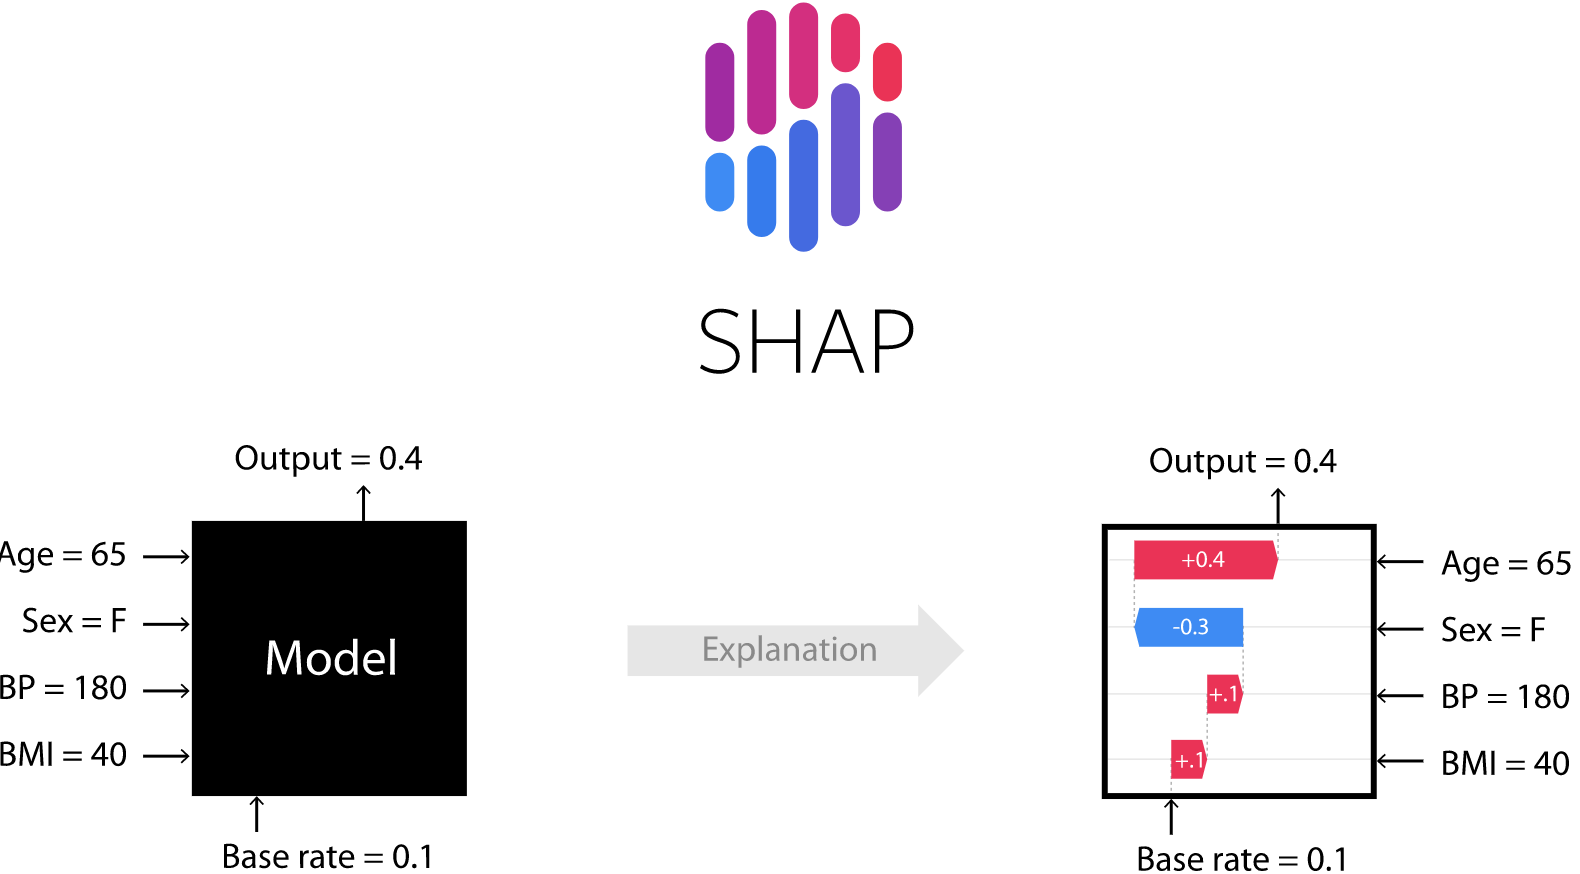

Shap 是一個可以將機器學習透過視覺化方式輔助理解的 Explainable AI 套件，優點如下

- 簡單安裝
- 視覺化呈現

### 實作程式碼

In [122]:
import pandas as pd
import xgboost
import shap
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('Book_Purchased.csv')

for _ , col in enumerate(dataset.columns.tolist()):
    if dataset[col].dtype == 'object':
        dataset[col] = dataset[col].astype('category').cat.codes

X = dataset[['Gender', 'Age', 'Salary', 'VIP']]
y = dataset[['Purchased']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
classifier = xgboost.XGBClassifier().fit(X_train, y_train)

explainer = shap.Explainer(classifier)
shap_values = explainer(X_train)

[17:00:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


#### 單一資料解釋

第一筆資料有 0.98 預測為 Purchased = 1

In [152]:
X_train[:1]

,Gender,Age,Salary,VIP
336,1,61,158400.0,0


In [153]:
classifier.predict_proba(X_train[:1])

array([[0.01796407, 0.98203593]], dtype=float32)

紅色代表正的貢獻度、藍色代表負的貢獻度
- 正面的影響：
  - Age: +3.3
  - Salary: +2
- 負面的影響：
  - VIP: -0.32
  - Gender: -0.3

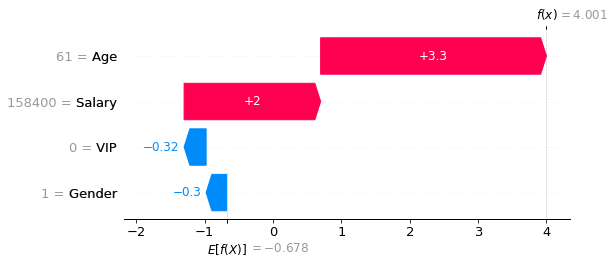

In [154]:
# waterfall
shap.plots.waterfall(shap_values[0])

In [124]:
# force plot
shap.force_plot(explainer.expected_value, shap_values.values[0,:], X_train.iloc[0,:])

#### 整體資料解釋

##### summary plot

- 點的顏色: Feature value 的大小，越紅越高、越藍越低；
- X 軸： shape value 的範圍

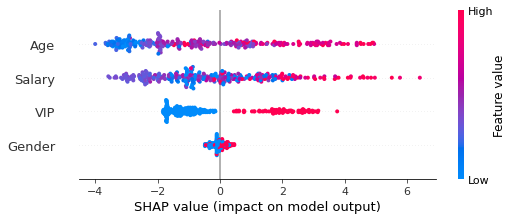

In [121]:
shap.summary_plot(shap_values, X_train)

- VIP 的註記對於分類很有幫助
- Age、Salary 的大小某種程度都會影響預測值；而 Gender 並沒有什麼幫助
- 年齡越小對於預測值的貢獻度越低

##### Aggregated force plot

這張圖真的是 shap 一大賣點，還可以操作 x 、ｙ 軸 切換不同的維度看資料

In [40]:
# 切第 0~4 筆資料查看
shap.force_plot(explainer.expected_value, shap_values.values[0:5,:],X.iloc[0:5,:], plot_cmap="DrDb")

In [155]:
# 看整體資料
shap.force_plot(explainer.expected_value, shap_values.values, X_train, plot_cmap="DrDb")

#### 其他圖參考

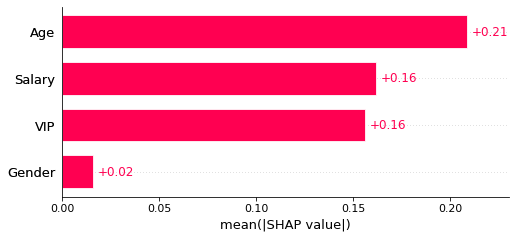

In [44]:
shap.plots.bar(shap_values)

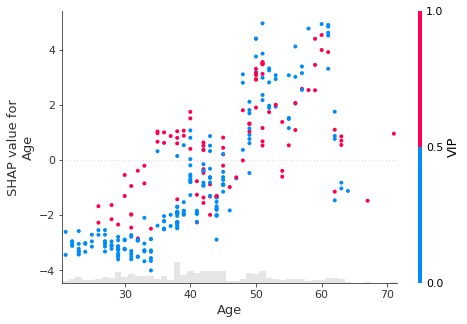

In [156]:
shap.plots.scatter(shap_values[:, "Age"], color=shap_values[:,"VIP"])

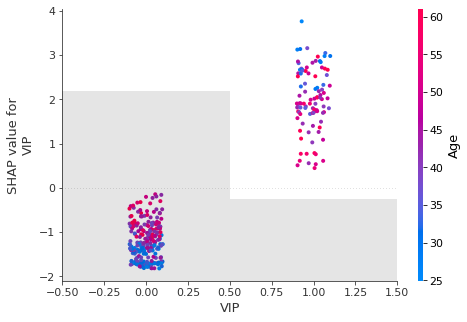

In [157]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"VIP"], color=shap_values[:,"Age"])

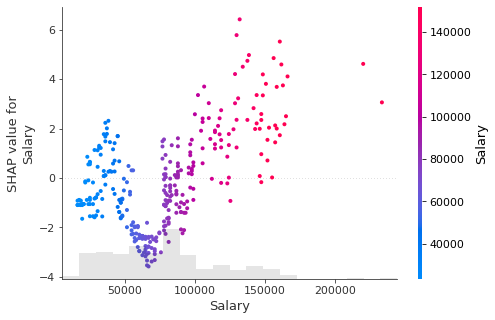

In [158]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"Salary"], color=shap_values[:,"Salary"])